# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
!pip install statsmodels


In [ ]:
#Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

#Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
#Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
#Setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

#Library to split data
from sklearn.model_selection import train_test_split

#To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [ ]:
df_main = pd.read_csv("INNHotelsGroup.csv")

In [ ]:
# copying data to another variable to avoid any changes to original data
data = df_main.copy()

In [ ]:
#View the first 5 rows of the dataset.
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
#Understand the shape of the dataset
data.shape

(36275, 19)

In [ ]:
#Check the data types of the columns for the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
#convert all columns with dtype object into category (I am doing this because I was facing RAM issue)
for col in data.columns[data.dtypes=='object']:
    data[col] = data[col].astype('category')


In [ ]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  category
 1   no_of_adults                          36275 non-null  int64   
 2   no_of_children                        36275 non-null  int64   
 3   no_of_weekend_nights                  36275 non-null  int64   
 4   no_of_week_nights                     36275 non-null  int64   
 5   type_of_meal_plan                     36275 non-null  category
 6   required_car_parking_space            36275 non-null  int64   
 7   room_type_reserved                    36275 non-null  category
 8   lead_time                             36275 non-null  int64   
 9   arrival_year                          36275 non-null  int64   
 10  arrival_month                         36275 non-null  int64   
 11  ar

In [ ]:
# checking for null values
data.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


There are no null values in the dataset

In [ ]:
#Statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [ ]:
data.describe(include = ['category'])

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275,36275
unique,36275,4,7,5,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27835,28130,23214,24390


In [ ]:
# checking for duplicate values
data.duplicated().sum()

0

There are no duplicate values in the data.

## Data Overview

- Observations
- Sanity checks

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10,5))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

####Univariate Analysis

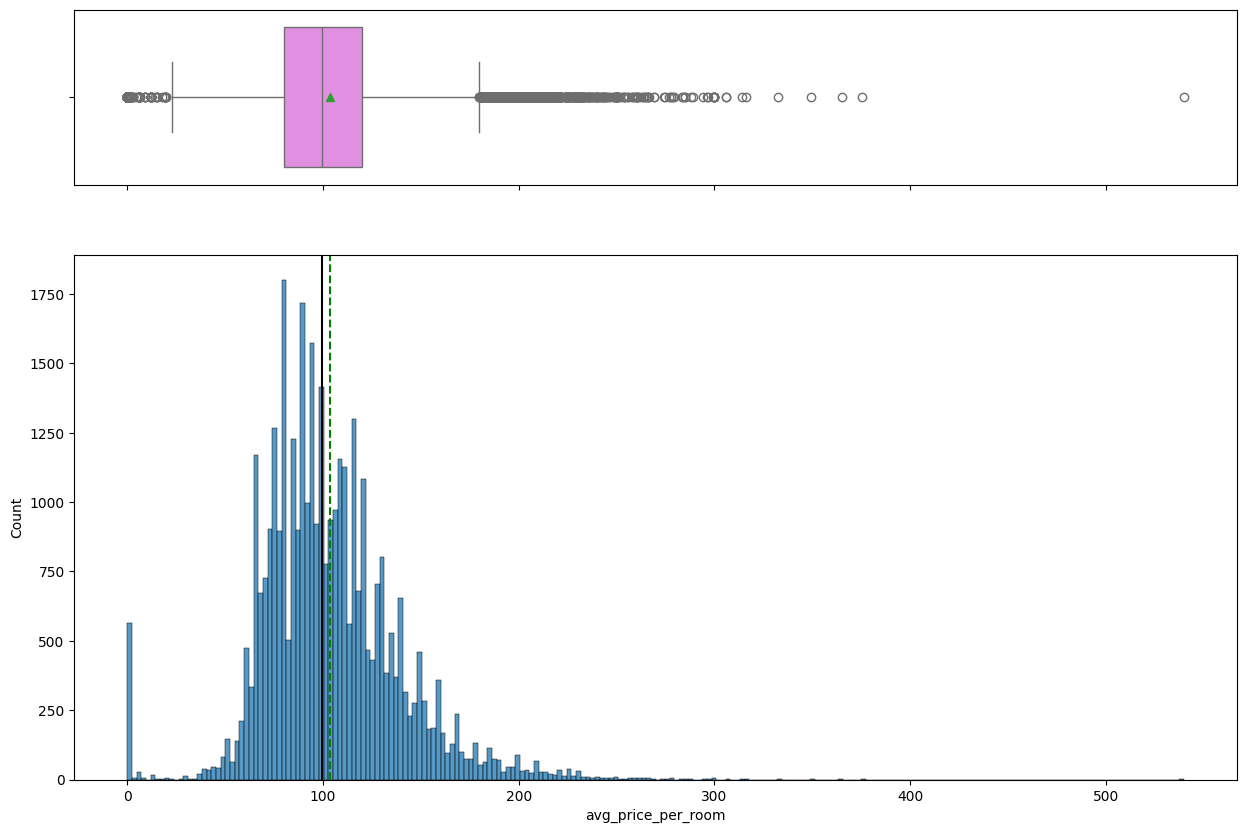

In [ ]:
histogram_boxplot(data, "avg_price_per_room")

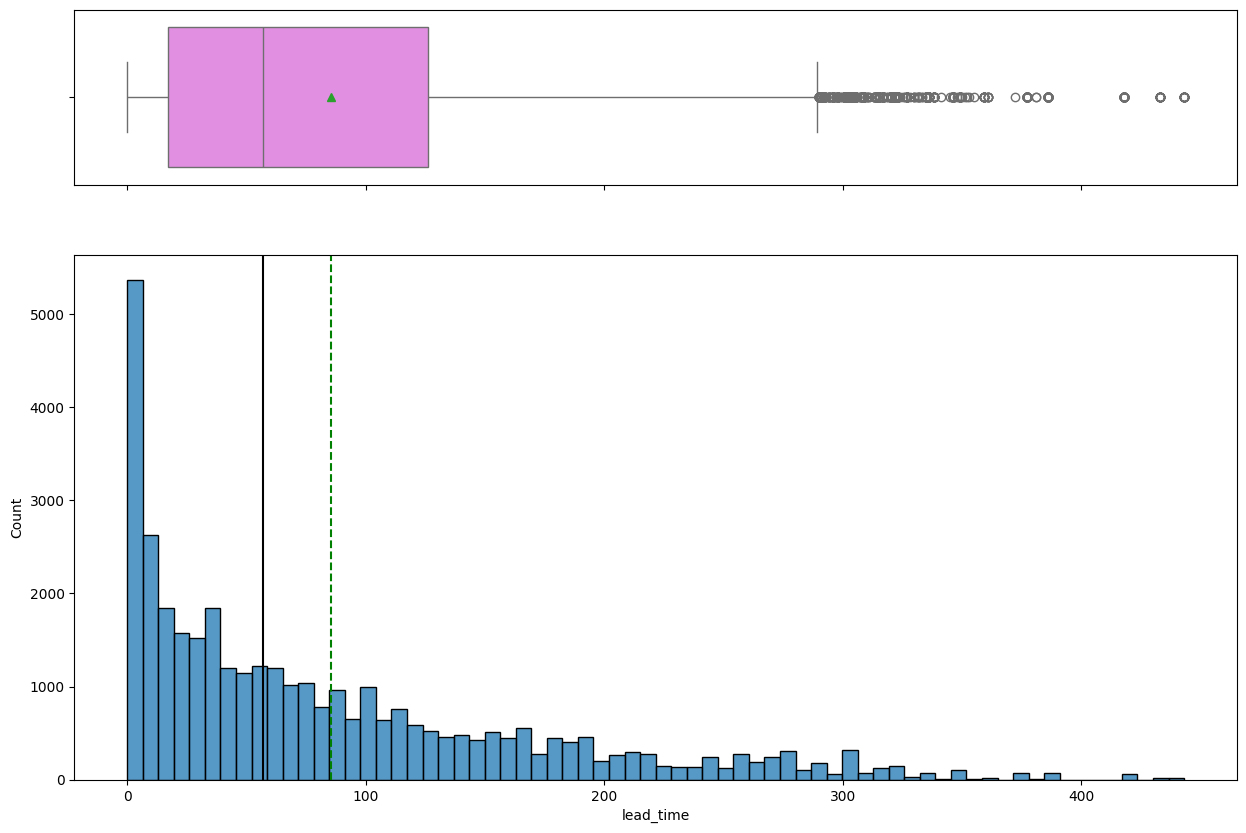

In [ ]:
histogram_boxplot(data, "lead_time")

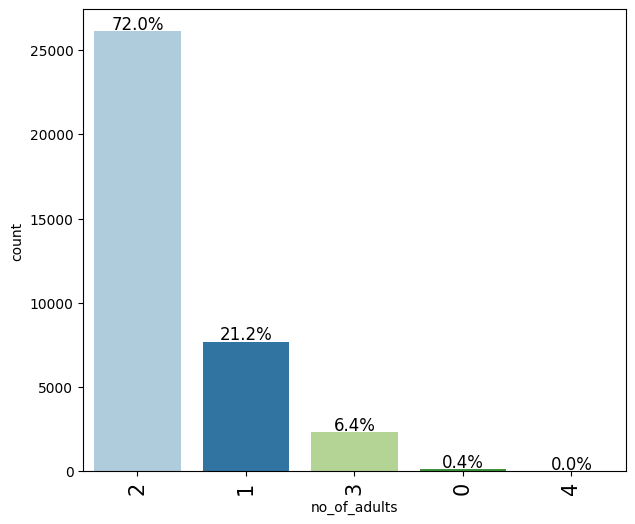

In [ ]:
labeled_barplot(data, 'no_of_adults', perc=True)


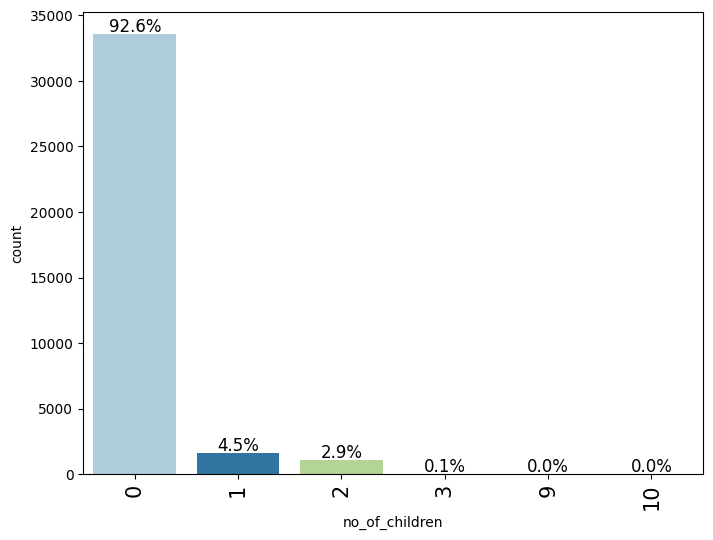

In [ ]:
labeled_barplot(data, 'no_of_children', perc=True)


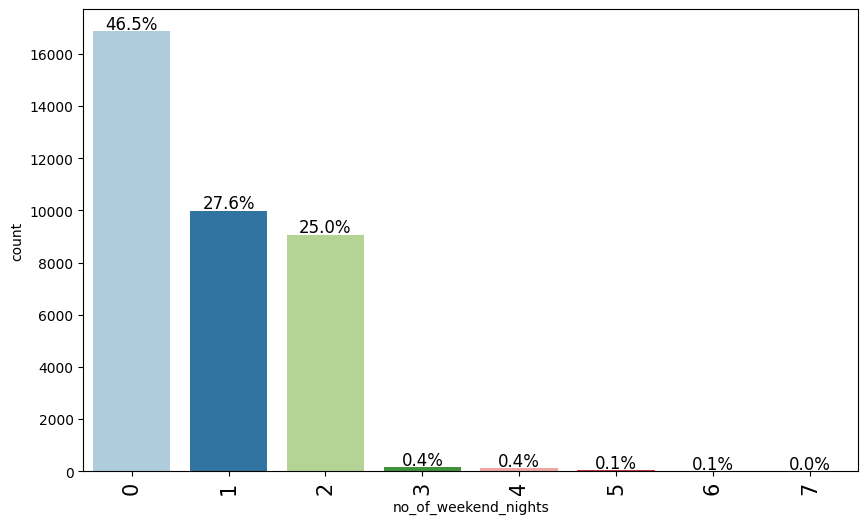

In [ ]:
labeled_barplot(data, 'no_of_weekend_nights', perc=True)

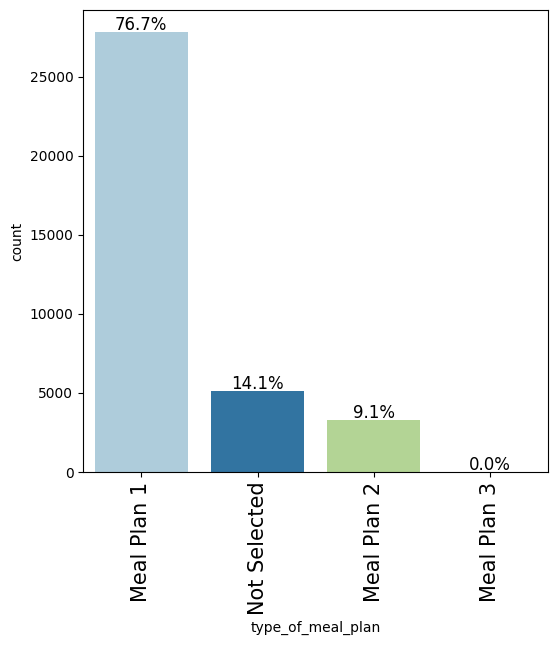

In [ ]:
labeled_barplot(data, 'type_of_meal_plan', perc=True)

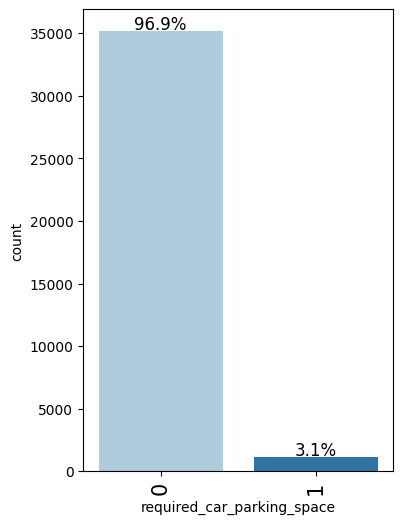

In [ ]:
labeled_barplot(data, 'required_car_parking_space', perc=True)

2.Which market segment do most of the guests come from?

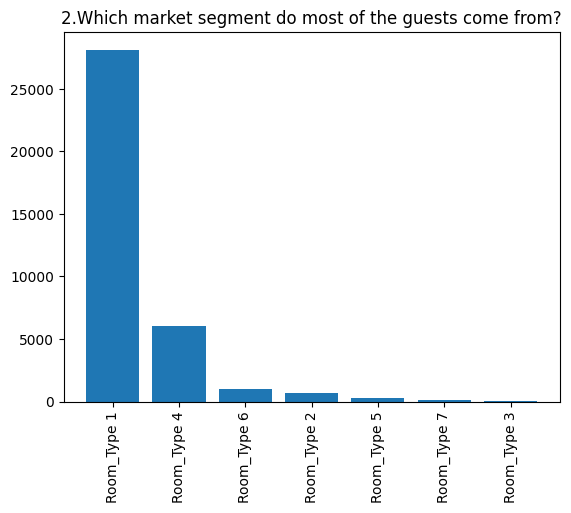

In [ ]:
plt.bar(data['room_type_reserved'].value_counts().index, data['room_type_reserved'].value_counts().values)
plt.title('2.Which market segment do most of the guests come from?')
plt.xticks(rotation=90)
plt.show()

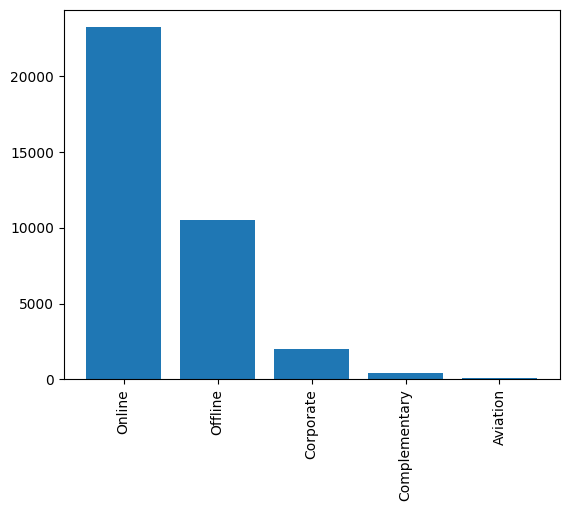

In [ ]:
plt.bar(data['market_segment_type'].value_counts().index, data['market_segment_type'].value_counts().values)
plt.xticks(rotation=90)
plt.show()

1.What are the busiest months in the hotel?

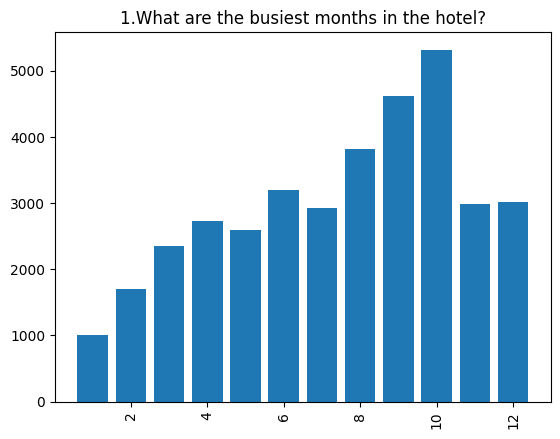

In [ ]:
plt.bar(data['arrival_month'].value_counts().index, data['arrival_month'].value_counts().values)
plt.title('1.What are the busiest months in the hotel?')
plt.xticks(rotation=90)
plt.show()


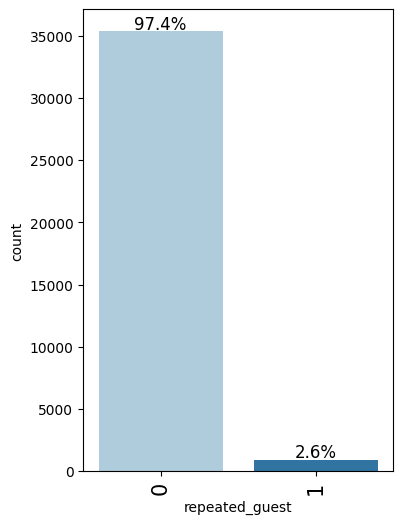

In [ ]:
labeled_barplot(data, 'repeated_guest', perc=True)

4.What percentage of bookings are canceled?


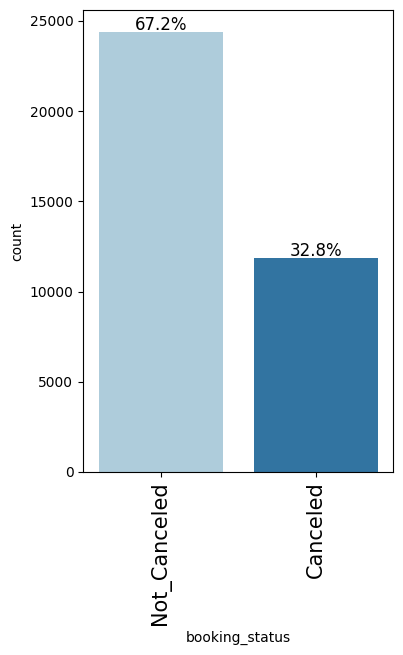

In [ ]:
labeled_barplot(data, 'booking_status', perc=True)


####Bivariate Analysis

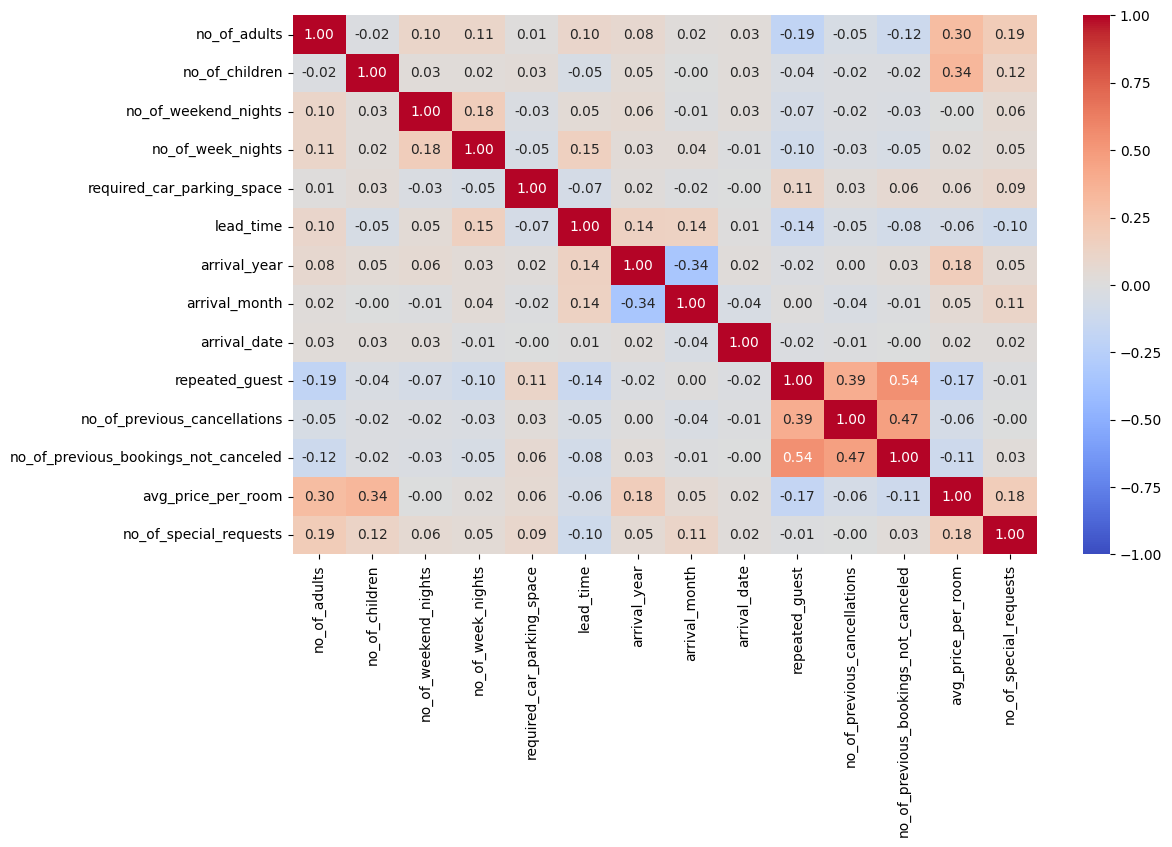

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm"
)
plt.show()

<Figure size 600x300 with 0 Axes>

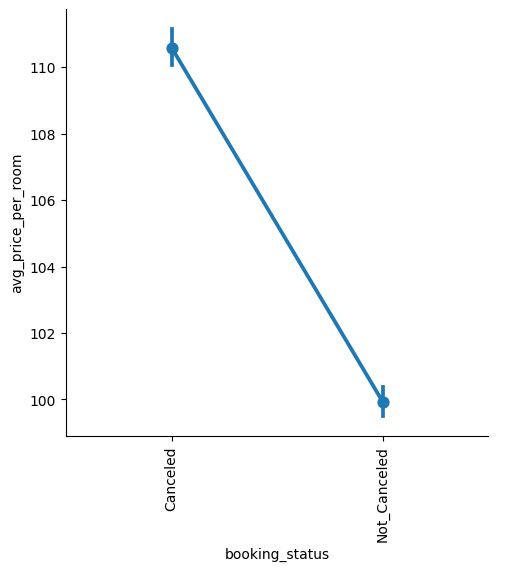

<Figure size 600x300 with 0 Axes>

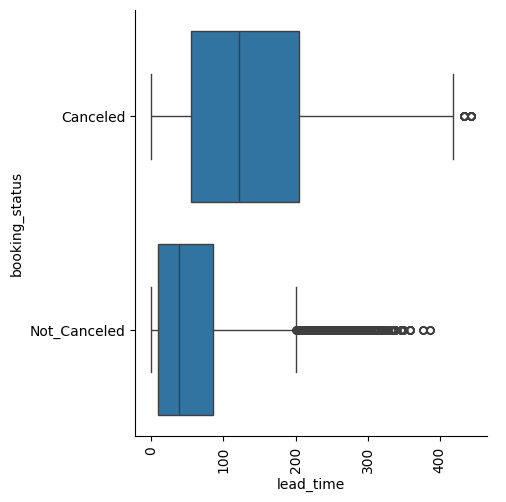

<Figure size 600x300 with 0 Axes>

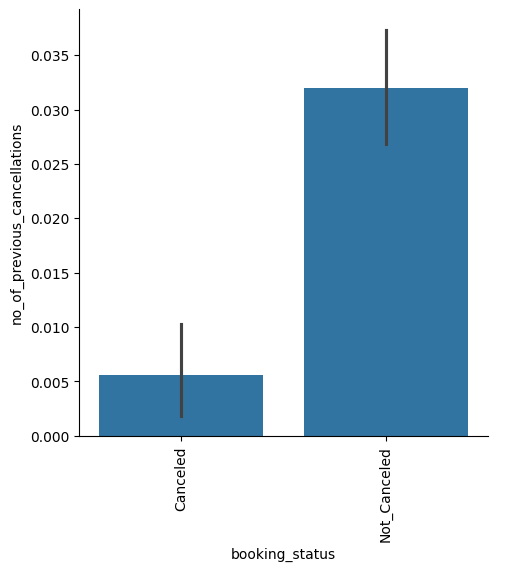

In [ ]:
#catplot for analyzing booking status
print('\n')
plt.figure(figsize = (6,3))
sns.catplot(data = data, y = 'avg_price_per_room', x = 'booking_status', kind='point')
plt.xticks(rotation=90)
plt.show()

print('\n')
plt.figure(figsize = (6,3))
sns.catplot(data = data, x = 'lead_time', y = 'booking_status', kind='box')
plt.xticks(rotation=90)
plt.show()

print('\n')
plt.figure(figsize = (6,3))
sns.catplot(data = data, y = 'no_of_previous_cancellations', x = 'booking_status', kind='bar')
plt.xticks(rotation=90)
plt.show()


- Average price is high for cancelled bookings
- Median lead time for cancelled bookings is high


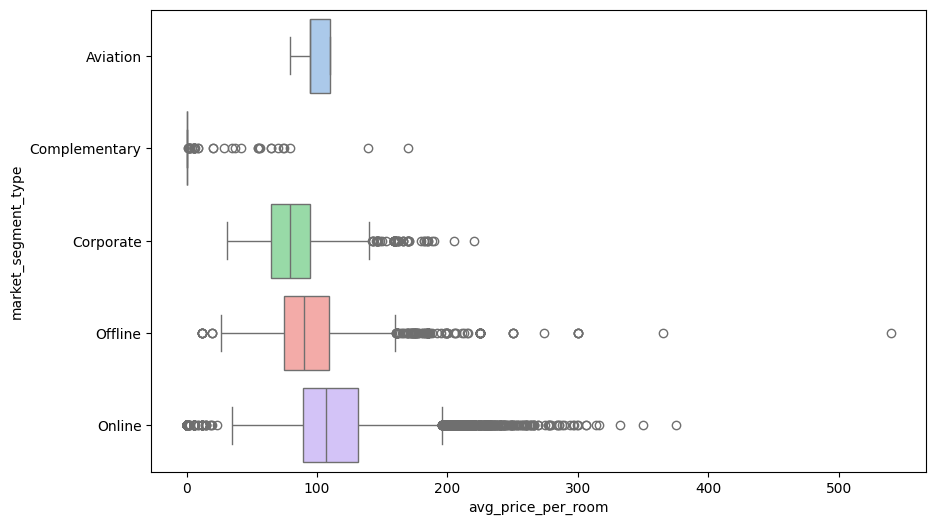

In [ ]:
#Q3. What are the differences in room prices in different market segments?
plt.figure(figsize=(10,6))
sns.boxplot(data=data,y='market_segment_type',x='avg_price_per_room',palette='pastel')
plt.show()

Q5. What percentage of repeating guests cancel??

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


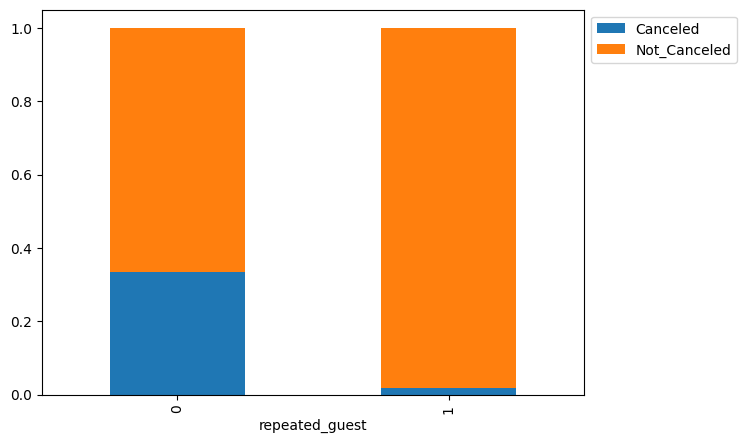

In [ ]:
#Q3. What percentage of repeating guests cancel??
data.groupby('repeated_guest')['booking_status'].value_counts(normalize=True)*100
stacked_barplot(data,'repeated_guest','booking_status')


booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


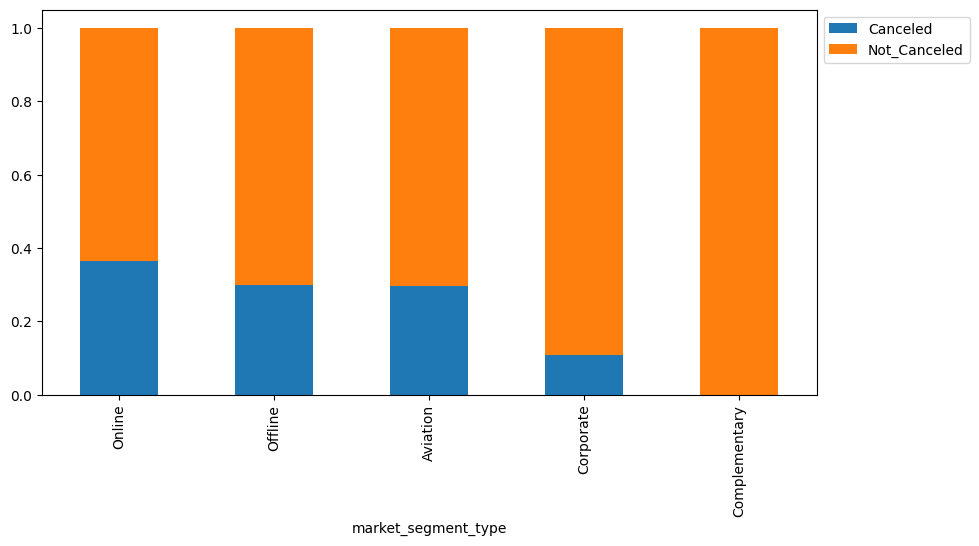

In [ ]:
stacked_barplot(data,'market_segment_type','booking_status')

6.Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?


booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


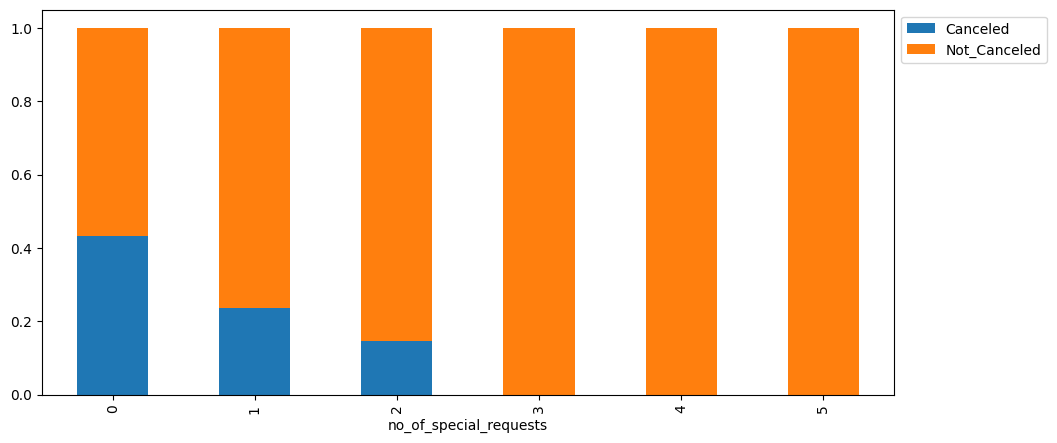

no_of_special_requests  booking_status
0                       Not_Canceled       56.793245
                        Canceled           43.206755
1                       Not_Canceled       76.233184
                        Canceled           23.766816
2                       Not_Canceled       85.403300
                        Canceled           14.596700
3                       Not_Canceled      100.000000
                        Canceled            0.000000
4                       Not_Canceled      100.000000
                        Canceled            0.000000
5                       Not_Canceled      100.000000
                        Canceled            0.000000
Name: proportion, dtype: float64

In [ ]:
#Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?
stacked_barplot(data,'no_of_special_requests','booking_status')
data.groupby('no_of_special_requests')['booking_status'].value_counts(normalize=True)*100

In [ ]:
# New column for lenght of stay
data['length_stay'] = data['no_of_weekend_nights'] + data['no_of_week_nights']

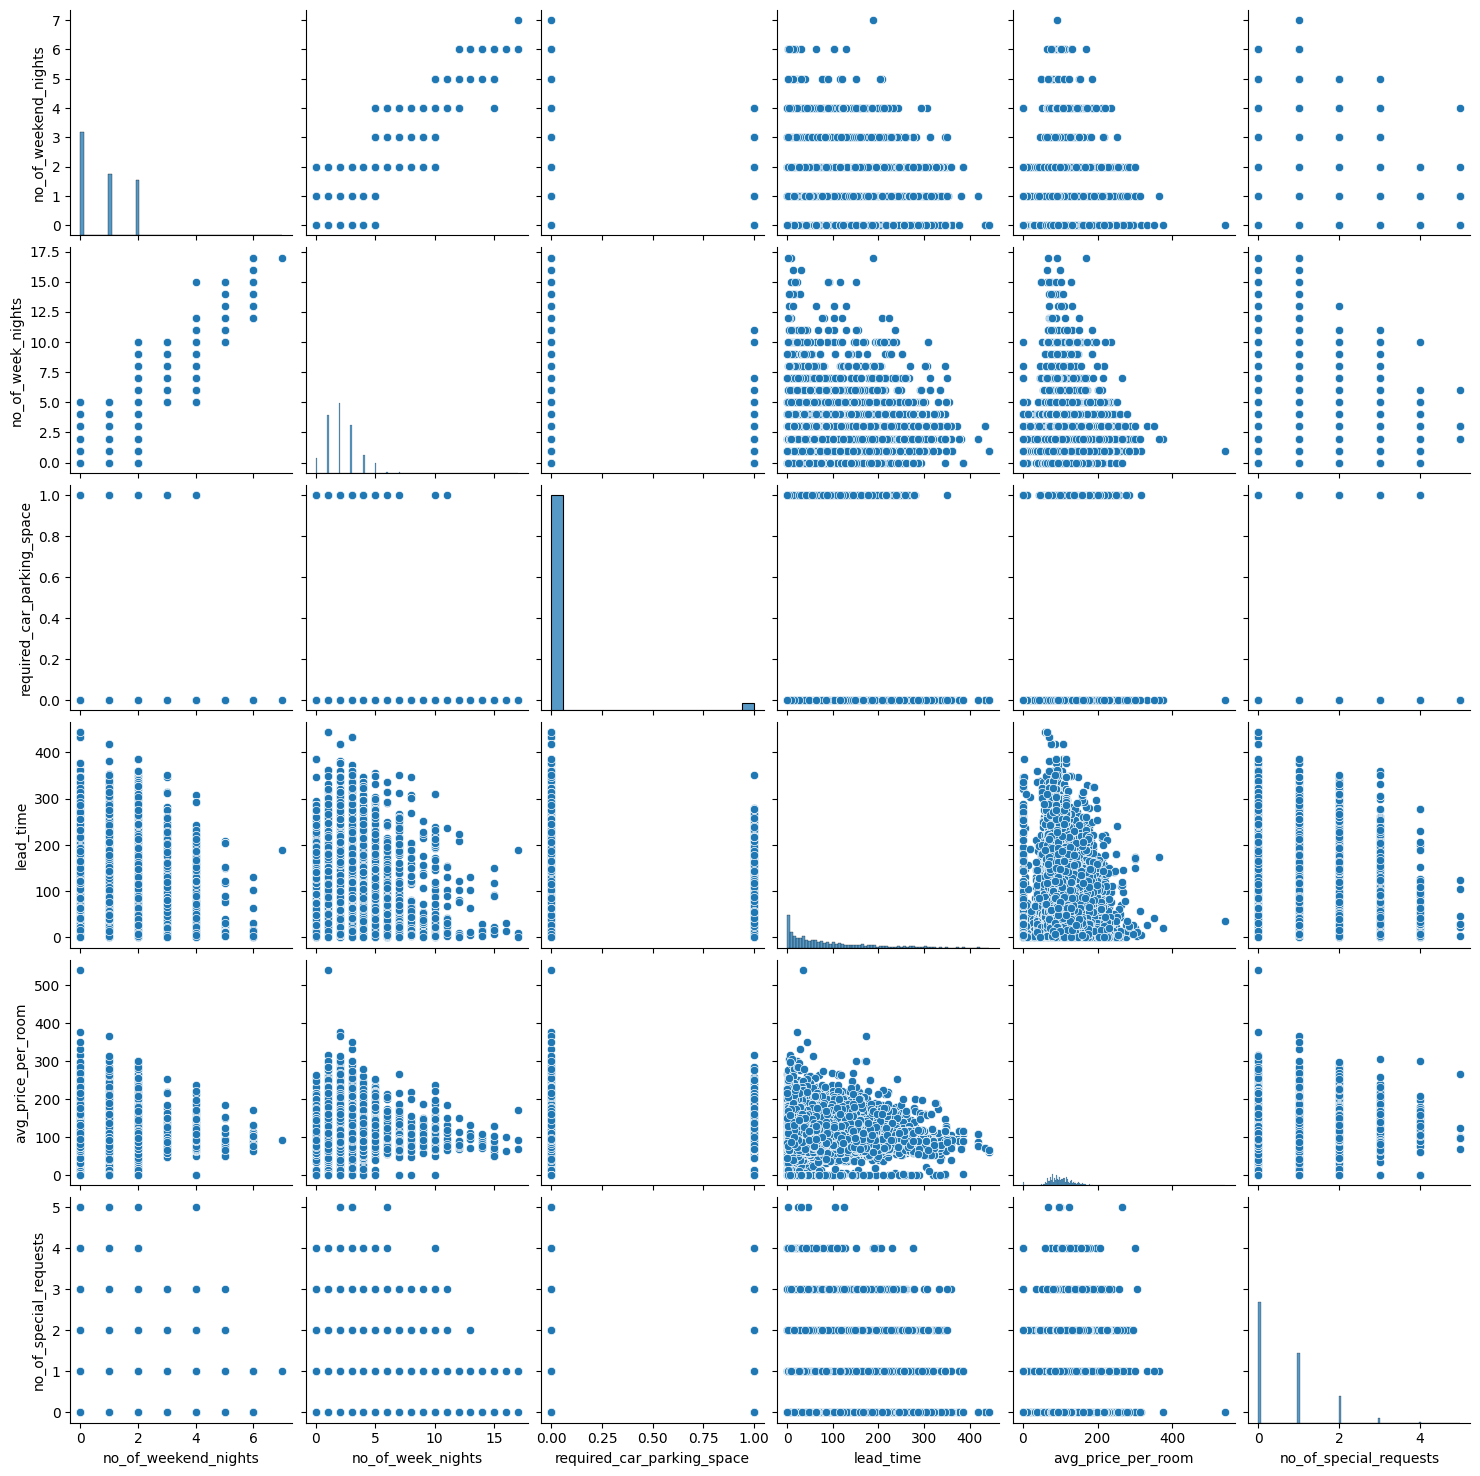

In [ ]:
sns.pairplot(data[['no_of_weekend_nights','no_of_week_nights','required_car_parking_space',
                   'lead_time','avg_price_per_room','no_of_special_requests','type_of_meal_plan',
                   'room_type_reserved','market_segment_type','booking_status']]);

From the above univariate and Bivariate Analysis, we can answer the Leading Questions:

1. What are the busiest months in the hotel?

    Month 10 = October.

2. Which market segment do most of the guests come from?

    Online 23214 or 64% of the bookings come via the internet.

3.  Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

    Online booking are the highest high follwed by Offline booking

4.  What percentage of bookings are canceled?

    32.8% of all bookings were cancelled.

5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

    About 1.75% of Repeating guest do not cancel.

6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

    Guest with higher requirements are less likely to cancel.


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

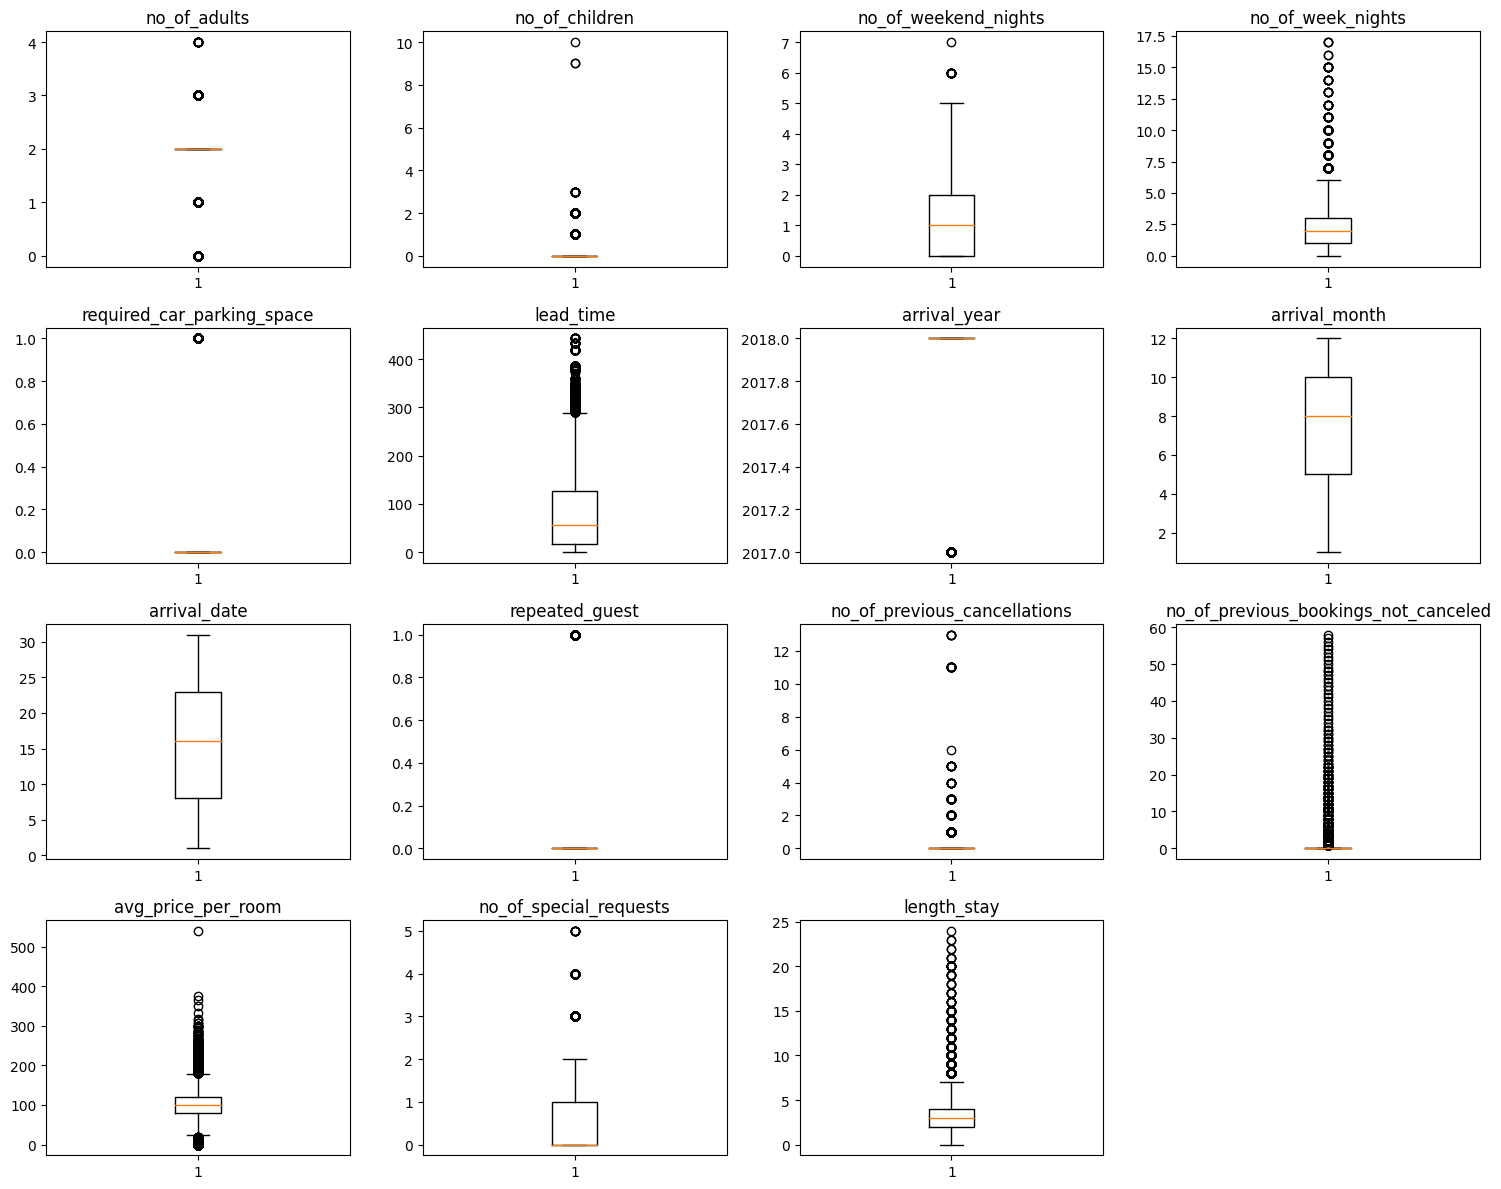

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

There are two heavy outlier columns,
lead_time
avg_room_price


####Outlier Treatment

In [ ]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

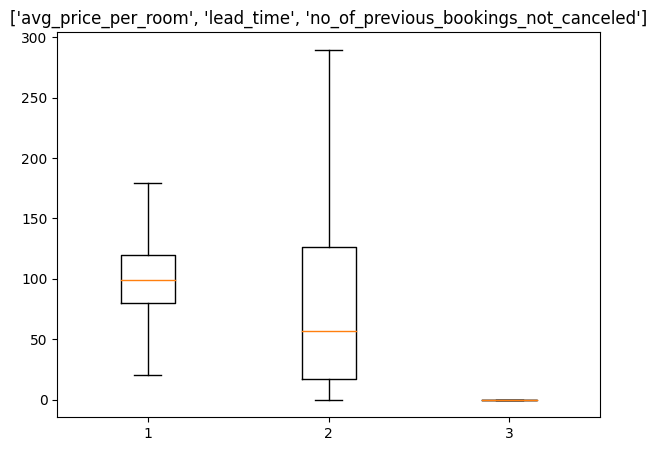

In [ ]:
# let's treat the outlier for 'avg_price_per_room', 'lead_time' and look at box plot to see if outliers have been treated or not

col_list = ['avg_price_per_room', 'lead_time','no_of_previous_bookings_not_canceled']
data = treat_outliers_all(data, col_list)
plt.figure(figsize=(7, 5))
plt.boxplot(data[col_list], whis=1.5)
plt.title(col_list)
plt.show()

In [ ]:
# drop column because they are not useful
data.drop(labels='Booking_ID', axis=1, inplace=True)
data.drop(labels='room_type_reserved', axis=1, inplace=True)
data.drop(labels='arrival_year', axis=1, inplace=True)


In [ ]:
data["booking_status"] = data["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

In [ ]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,length_stay
0,2,0,1,2,Meal Plan 1,0,224.0,10,2,Offline,0,0,0,65.00,0,0,3
1,2,0,2,3,Not Selected,0,5.0,11,6,Online,0,0,0,106.68,1,0,5
2,1,0,2,1,Meal Plan 1,0,1.0,2,28,Online,0,0,0,60.00,0,1,3
3,2,0,0,2,Meal Plan 1,0,211.0,5,20,Online,0,0,0,100.00,0,1,2
4,2,0,1,1,Not Selected,0,48.0,4,11,Online,0,0,0,94.50,0,1,2


####Data Preparation for Modeling

In [ ]:


X = data.drop('booking_status',axis=1)     # Predictor feature columns (8 X m)
Y = data['booking_status']   # Predicted class (1=True, 0=False) (1 X m)

X = pd.get_dummies(X, drop_first=True)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,length_stay,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
13662,1,0,0,1,0,163.0,10,15,0,0,0,115.00,0,1,False,False,False,False,False,True,False
26641,2,0,0,3,0,113.0,3,31,0,0,0,78.15,1,3,False,False,False,False,False,False,True
17835,2,0,2,3,0,289.5,10,14,0,0,0,78.00,1,5,False,False,False,False,False,True,False
21485,2,0,0,3,0,136.0,6,29,0,0,0,85.50,0,3,False,False,True,False,False,False,True
5670,2,0,1,2,0,21.0,8,15,0,0,0,151.00,0,3,False,False,False,False,False,False,True


In [ ]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print(' ')
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print(' ')
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 21)
Shape of test set :  (10883, 21)
 
Percentage of classes in training set:
booking_status
0    0.670644
1    0.329356
Name: proportion, dtype: float64
 
Percentage of classes in test set:
booking_status
0    0.676376
1    0.323624
Name: proportion, dtype: float64


In [ ]:
y_train.head()

,booking_status
13662,1
26641,0
17835,0
21485,1
5670,1


We had seen that around 67% of observations belongs to class 0 (Not Cancelled) and 32% observations belongs to class 1 (Cancelled), and this is preserved in the train and test set.

####Model Building - Logistic Regression

In [ ]:
# fitting logistic regression model
logit = sm.Logit(y_train, x_train.astype(float))
lg = logit.fit(disp=False, method='bfgs') # Use a different optimization method

print(lg.summary())


                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25373
Method:                           MLE   Df Model:                           18
Date:                Fri, 23 Aug 2024   Pseudo R-squ.:                  0.3169
Time:                        12:54:57   Log-Likelihood:                -10993.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_adults                            -0.1048        nan        nan        nan         nan         nan
no_of_children                           0.1274      

**Observations**

- Negative values of the coefficient show that the probability of canceling a booking  decrese of with the increase of the corresponding attribute value.

- Positive values of the coefficient show that the probability canceling a bookinf increases with the increase of the corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

###Model Performance Evaluation




## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a person booking a room will cancel, but in real they do not.
2. Predicting a person booking a room will not cancel, but in real they do.

### Which case is more important?
* Both are important:

    * If we predict a person will cancel and then they do not, then we will reallocate their room to another guest and not have a room available to them upon their arrival, costing the hotel a significant amount of money (by offering them a complimentary upgraded room), likely losing a repeat customer(s), and generating negative review(s) for the hotel.

    * If we predict a person will not cancel their reservation and then they do, we will lose out on the revenue generated from their reservation, have to incur the costs of remarketing the room, and more than likely rebook the room at a discount.

### How to reduce these costs i.e maximize True Positives?
*  **F1 score** should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.


###How to reduce this loss?

* We need to reduce both False Negatives and False Positives

* `f1_score` should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly
  * fi_score is computed as
  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot confusion matrix

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

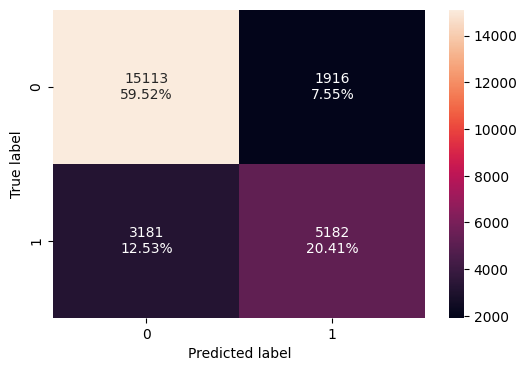

In [ ]:
confusion_matrix_statsmodels(lg, x_train, y_train)

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg, x_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.799267,0.619634,0.730065,0.670332


Observations

Negative values of the coefficient shows that the probability of a hotel booking being cancelled decreases with the increase of corresponding attribute value.

Positive values of the coefficient show that that probability of a hotel booking being cancelled increases with the increase of corresponding attribute value.

p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant. However, these variables might contain multicollinearity, which will affect the p-values.

We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, we must ensure that multicollinearity is not present in the data.
* **General Rule of thumb**:
  - If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence  the variance of $\beta_k$ is not inflated at all
  - If VIF exceeds 5, we say there is moderate multicollinearity
  - If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

* The purpose of the analysis should dictate which threshold to use

In [ ]:
# defining a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif


In [ ]:
checking_vif(X_train).sort_values(by='VIF', ascending=False)


,feature,VIF
0,const,327.586292
20,market_segment_type_Online,70.724938
19,market_segment_type_Offline,63.481180
18,market_segment_type_Corporate,16.790930
17,market_segment_type_Complementary,4.437653
9,repeated_guest,1.778035
11,no_of_previous_bookings_not_canceled,1.647040
12,avg_price_per_room,1.645479
10,no_of_previous_cancellations,1.393793
1,no_of_adults,1.275193


Only the dummy variables show a VIF above 5. No need to drop any variables

**The above predictors have no multicollinearity and the assumption is satisfied.**

### Removing high p-value variables



In [ ]:
# initial list of columns
cols = x_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['no_of_weekend_nights', 'required_car_parking_space', 'lead_time', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


In [ ]:
X_train2 = x_train[selected_features]


In [ ]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25378
Method:                           MLE   Df Model:                           13
Date:                Thu, 22 Aug 2024   Pseudo R-squ.:                  0.3175
Time:                        23:51:01   Log-Likelihood:                -10982.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
no_of_weekend_nights               0.0893      0.019      4.651      0.000       0.052       0.127
required_car_parking_space        -1.6500      0.137    -12.016      0.

**Now no feature has p-value greater than 0.05, so we'll consider the features in X_train2 as the final ones and lg2 as final model.**

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

##Coefficient interpretations

* Coefficients for tno_of_weekend_nights,
lead_time,
no_of_previous_cancellations,
avg_price_per_room,
type_of_meal_plan_Meal Plan 2,
type_of_meal_plan_Not Selected are all positive, meaning an increase in these will lead to increase in chances of a hotel booking being cancelled.

* Coefficients for
required_car_parking_space,
arrival_month,
arrival_date,
no_of_special_requests,
market_segment_type_Corporate,
market_segment_type_Offline,
market_segment_type_Online
 are all negative, meaning an increase in these will lead to decrease in chances of a hotel booking being cancelled.

####Converting coefficients to odds


* The coefficients ($\beta$s) of the logistic regression model are in terms of $log(odds)$ and to find the odds, we have to take the exponential of the coefficients
* Therefore, **$odds =  exp(\beta)$**
* The percentage change in odds is given as $(exp(\beta) - 1) * 100$

In [ ]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odds": perc_change_odds}, index=X_train2.columns).sort_values(by='Change_odds')

,Odds,Change_odds
market_segment_type_Offline,0.018284,-98.171598
repeated_guest,0.034871,-96.512903
market_segment_type_Corporate,0.046965,-95.303536
market_segment_type_Online,0.115014,-88.498605
required_car_parking_space,0.192049,-80.795096
no_of_special_requests,0.240882,-75.911803
arrival_month,0.924553,-7.544721
arrival_date,0.995449,-0.455145
lead_time,1.016469,1.646867
avg_price_per_room,1.016828,1.682820


### Coefficient interpretations

* *repeated_guest*: Holding all other features constant, a unit change in repeated_guest (i.e., a person booking the room being a repeated guest) decreases the odds that booking being canceled by 0.06 times or a **94%** decrease in odds of a booking being canceled.
* *market_segment_type_Offline*: Holding all other features constant, a unit change in market_segment_type_Offline (i.e., a booking originating from the Offline market segment) decreases the odds that booking being canceled by 0.17 times or an **83%** decrease in odds of a booking being canceled.
* Similarly, other coefficients include:
    * A guest requiring a parking space decreases the odds of that booking being canceled by 0.20 times or an **80%** decrease in odds of a booking being canceled.
    * A single additional euro increase in the average cost per night increases the odds of that booking being canceled by 1.02 times or a **2%** increase in the odds of a booking being canceled.
    * A single additional night booked at the hotel increases the odds of that booking being canceled by 1.96 times or a **6%** increase in the odds of a booking being canceled.

*Interpretation for other attributes can be done similarly.*

#### Checking model performance on the training set

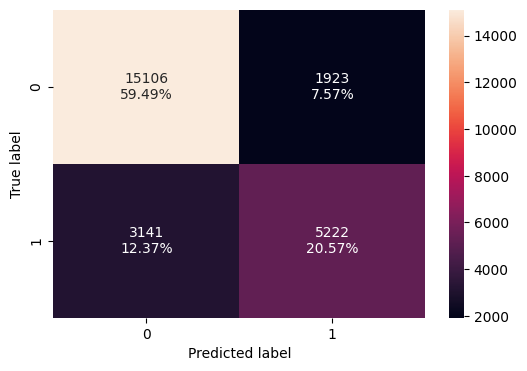

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train)

In [ ]:
log_reg_model_train_perf = model_performance_classification_statsmodels(lg2, X_train2, y_train)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.800567,0.624417,0.730861,0.673459


In [ ]:
X_test2= X_test[list(X_train2.columns)]

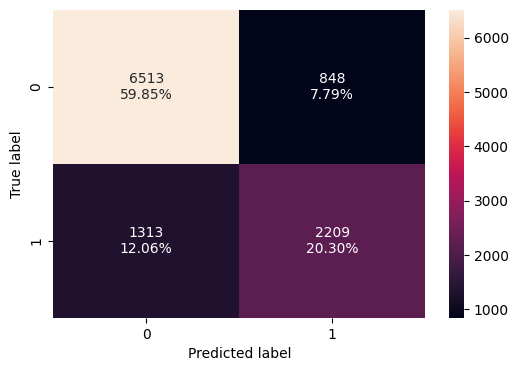

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.801433,0.6272,0.722604,0.671531


- The model is giving a good f1_score of ~0.67  on the train and test sets
- As the train and test performances are comparable, the model is not overfitting
- Moving forward we will try to improve the performance of the model

### ROC Curve and ROC-AUC

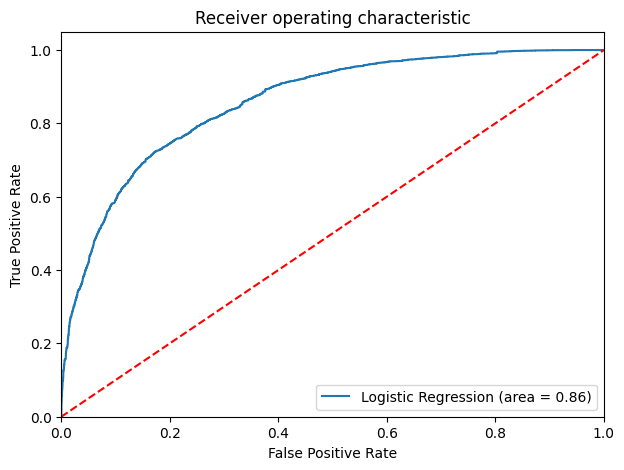

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Optimal threshold using AUC-ROC curve

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3929615576070019


**Checking model performance on training set**

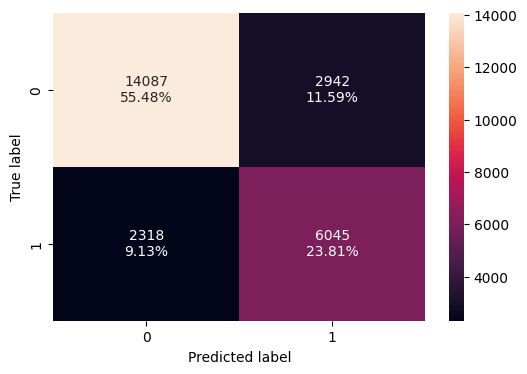

In [ ]:

# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.793807,0.723453,0.667365,0.694278


* Precision of model has increased but the other metrics have reduced.
* The model is still giving a good performance.

###Precision-Recall curve

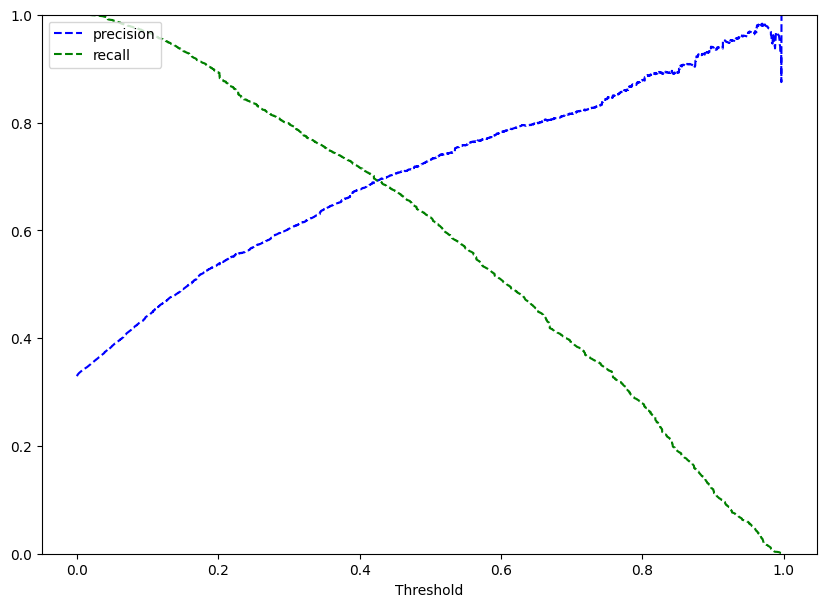

In [ ]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

At the threshold of approximately 0.4, we reach a balance of recall and precision scores.

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.42

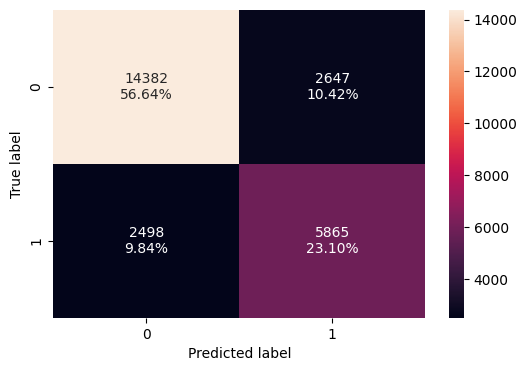

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.797377,0.701303,0.689027,0.695111


* Model is performing well on training set.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.58 as the optimal threshold.

**Checking model performance on test set**

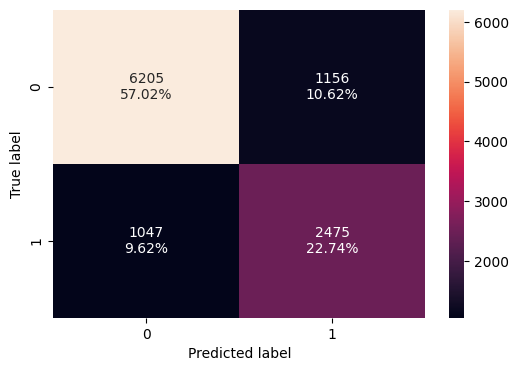

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.797574,0.702726,0.68163,0.692017


## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.38 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.38 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.800567,0.792848,0.797377
Recall,0.624417,0.722827,0.701303
Precision,0.730861,0.672638,0.689027
F1,0.673459,0.696830,0.695111


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.38 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.38 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.801433,0.793807,0.797574
Recall,0.627200,0.723453,0.702726
Precision,0.722604,0.667365,0.681630
F1,0.671531,0.694278,0.692017


## Final Model Summary

### Conclusions
* We were able to build a predictive model that can be used by INN Hotels to predict which bookings will be canceled with an F1 score of 0.70 on the training set.

* All the logistic regression models have given a generalized performance on both the training and test set, indicating this model should perform similarly for INN Hotels in production.

* Coefficients for the number of adults, the lead time prior to a booking, the arrival year (i.e., 2018 v. 2017), the number of previous cancellations, the average room price, the total nights booked, selecting Meal Plan 2, and not selecting a meal plan are all positive, meaning an increase in these will lead to increase in chances of a hotel booking being cancelled.

* Coefficients for requiring a parking space, arrival month, being a repeat guest, the number of special requests, and the market segments for Corporate and Offline are all negative, meaning an increase in these will lead to decrease in chances of a hotel booking being cancelled.

## Building a Decision Tree model

In [ ]:
# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

In [ ]:
linkcode
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

**Model evaluation criterion**

**Model can make wrong predictions as:**
- Predicting a machine will not fail but in reality, the machine will fail (FN)
- Predicting a machine will fail but in reality, the machine will not fail (FP)

**Which case is more important?**

- If we predict that a machine will not fail but in reality, the machine fails, then the company will have to bear the cost of repair/replacement and also face equipment downtime losses
- If we predict that a machine will fail but in reality, the machine does not fail, then the company will have to bear the cost of inspection
- The inspection cost is generally less compared to the repair/replacement cost

**How to reduce the losses?**

The company would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

Checking model performance on training set for the default data

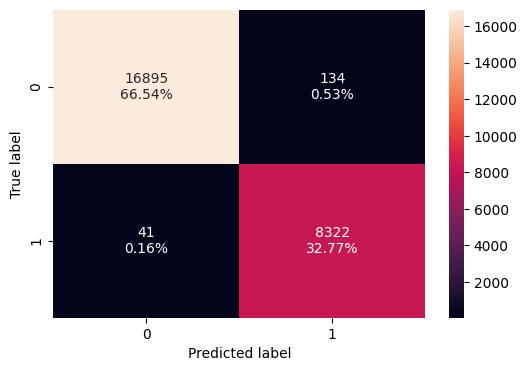

In [ ]:

#create a confusion matrix
confusion_matrix_sklearn(dtree, X_train, y_train)

In [ ]:
decision_tree_perf_train_default = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train_default

,Accuracy,Recall,Precision,F1
0,0.993108,0.995097,0.984153,0.989595


You can see that this is a perfect F1_score, which is almost 98%. Let's see what it looks like with the test set

Checking model performance on test set for the default data

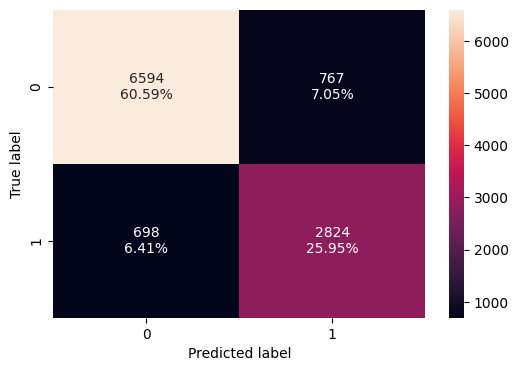

In [ ]:
confusion_matrix_sklearn(model,X_test,y_test)


In [ ]:
decision_tree_perf_test_default = model_performance_classification_sklearn(model,X_test,y_test)
decision_tree_perf_test_default

,Accuracy,Recall,Precision,F1
0,0.865386,0.801817,0.78641,0.794039


You can see that the F1 score is even less in the test set, which indicates overfitting

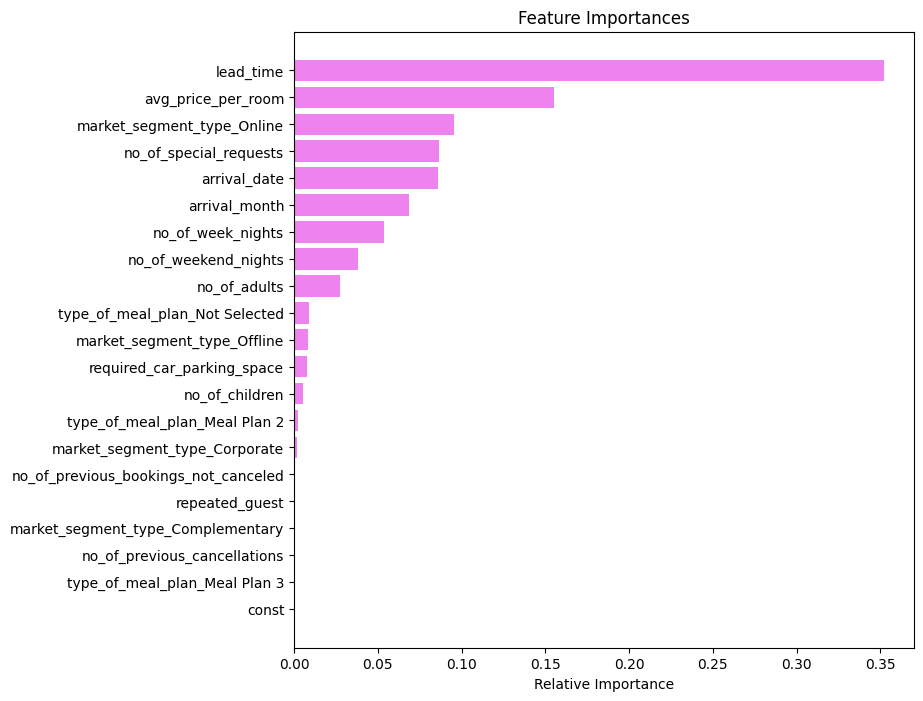

In [ ]:
#importance features
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Lead time is the most important feature for predicting customer default

## Do we need to prune the tree?

Yes. We found the model is overfitting hence we have to prune.

In [ ]:
# To tune different models
from sklearn.model_selection import GridSearchCV

In [ ]:
%%time
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

CPU times: user 24.7 s, sys: 2.68 ms, total: 24.7 s
Wall time: 25.3 s


DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

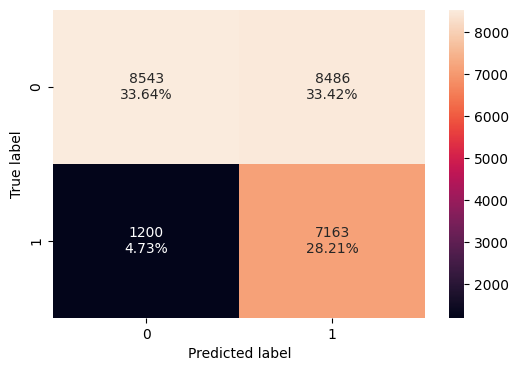

In [ ]:
#Checking performance on the training set
confusion_matrix_sklearn(estimator,X_train,y_train)


In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator,X_train,y_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.618541,0.856511,0.457729,0.596618


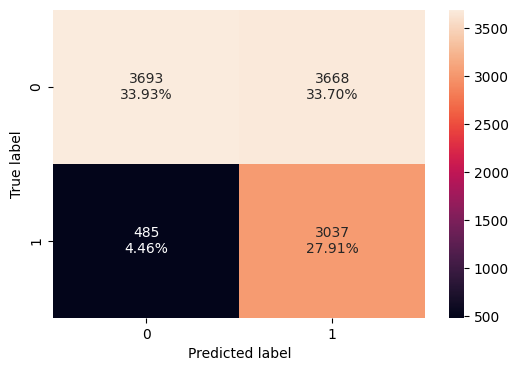

In [ ]:
#Checking performance on the test set
confusion_matrix_sklearn(estimator,X_test,y_test)


In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator,X_test,y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.618396,0.862294,0.452946,0.593918


The model is giving a generalized result now since the recall scores on both the train and test data are coming to be around 0.59 which shows that the model is able to generalize well on unseen data.

###Visualizing

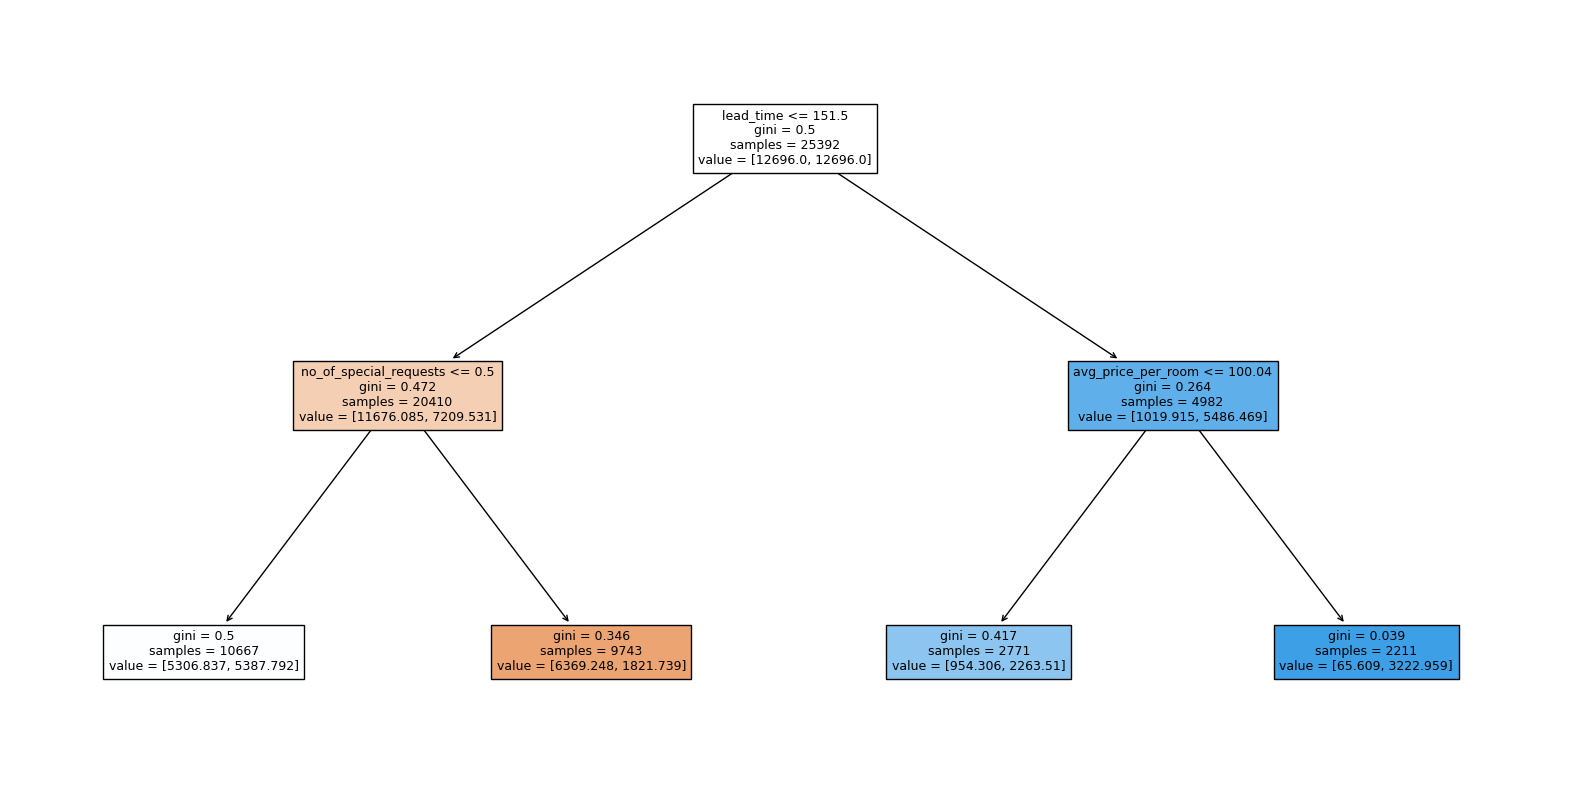

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:

#Text showing the different rules of the decision tree
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- weights: [5306.84, 5387.79] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [6369.25, 1821.74] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [954.31, 2263.51] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [65.61, 3222.96] class: 1



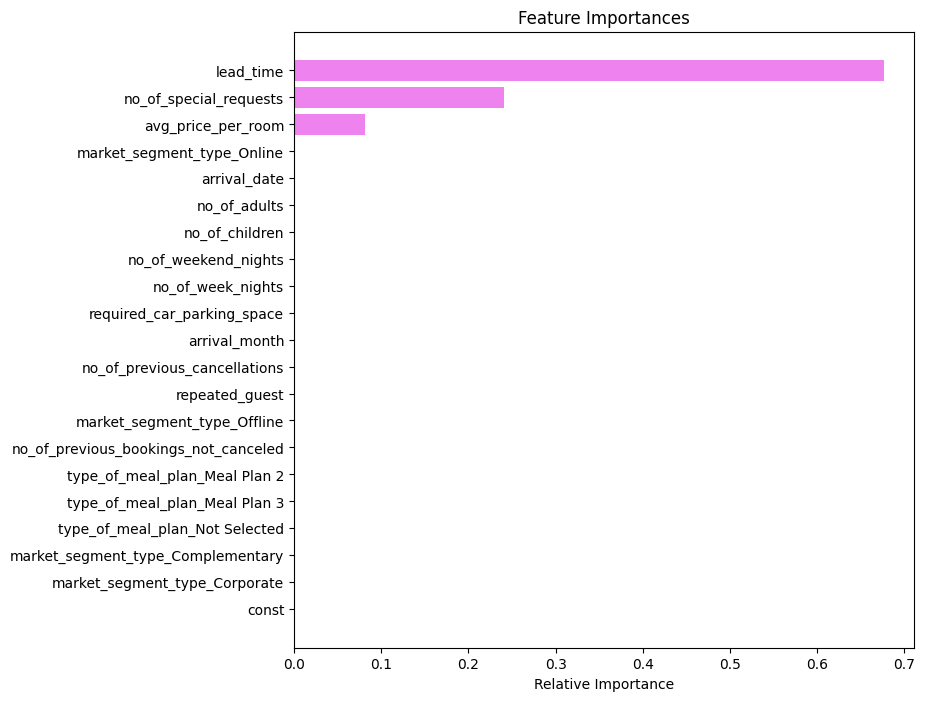

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

We can see that lead time still has the utmost importance feature.

####Cost Complexity Pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.008376
1,0.000000e+00,0.008376
2,2.933821e-20,0.008376
3,2.933821e-20,0.008376
4,2.933821e-20,0.008376
...,...,...
1841,8.901596e-03,0.328058
1842,9.802243e-03,0.337860
1843,1.271875e-02,0.350579
1844,3.412090e-02,0.418821


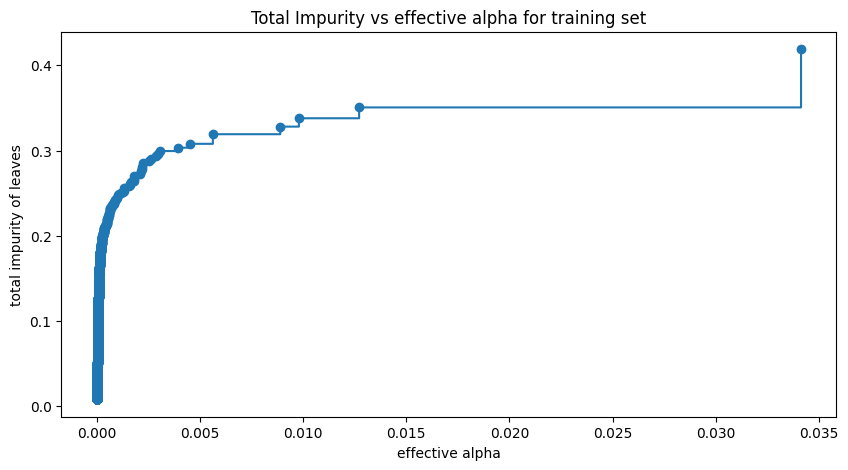

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136915


For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

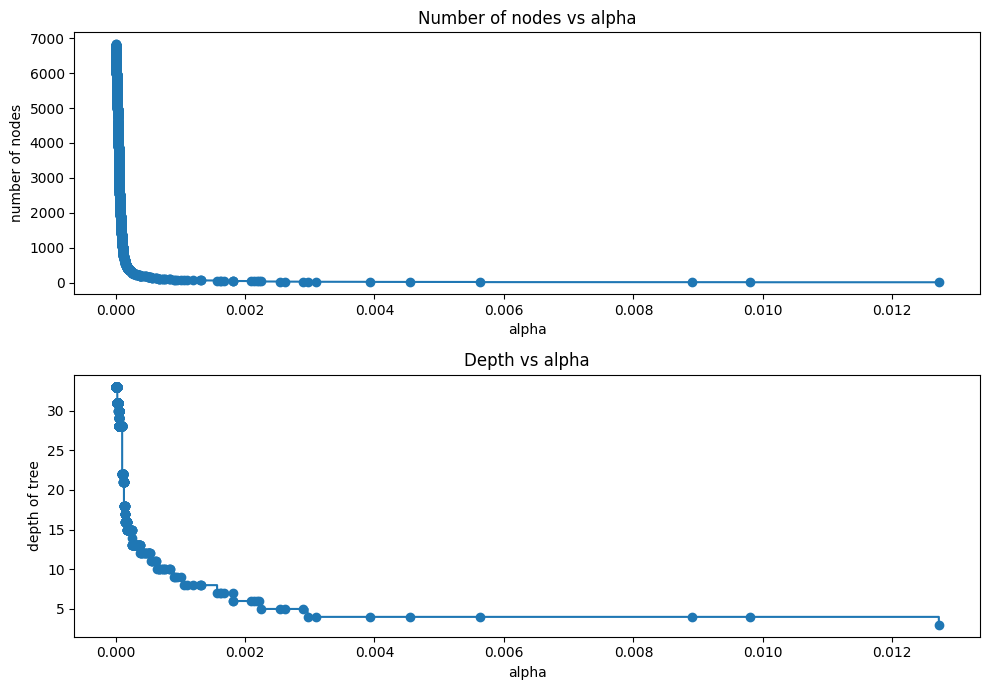

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


F1 Score vs alpha for training and testing sets

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

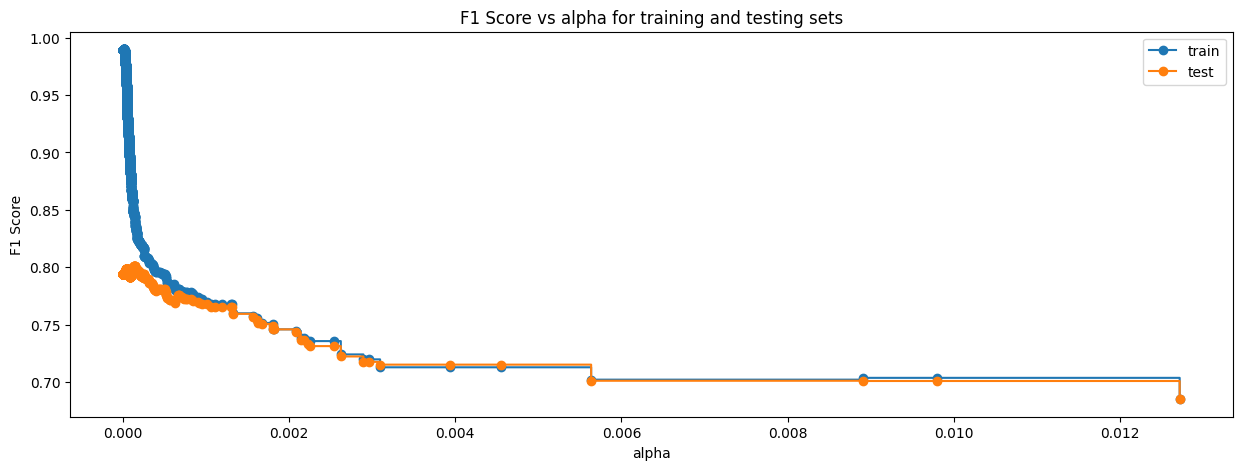

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00014384688056323105,
                       class_weight='balanced', random_state=1)


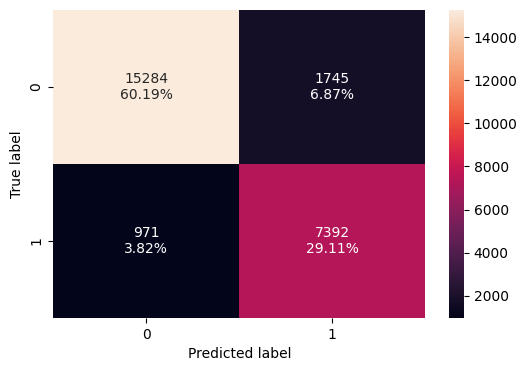

In [ ]:
#Checking performance on training set
#Confusion Matrix
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
#Metrics
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.893037,0.883893,0.809018,0.8448


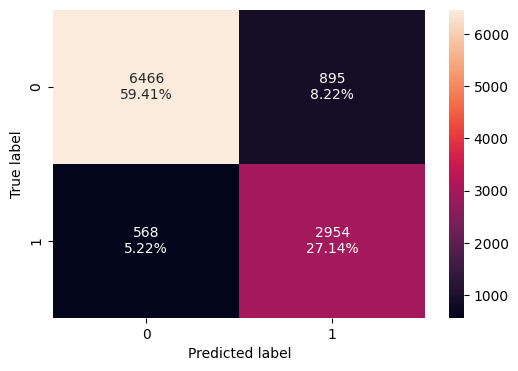

In [ ]:
#Checking performance of test set¶
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
#Metrics
decision_tree_test =  model_performance_classification_sklearn(best_model,X_train,y_train)
decision_tree_test

,Accuracy,Recall,Precision,F1
0,0.893037,0.883893,0.809018,0.8448


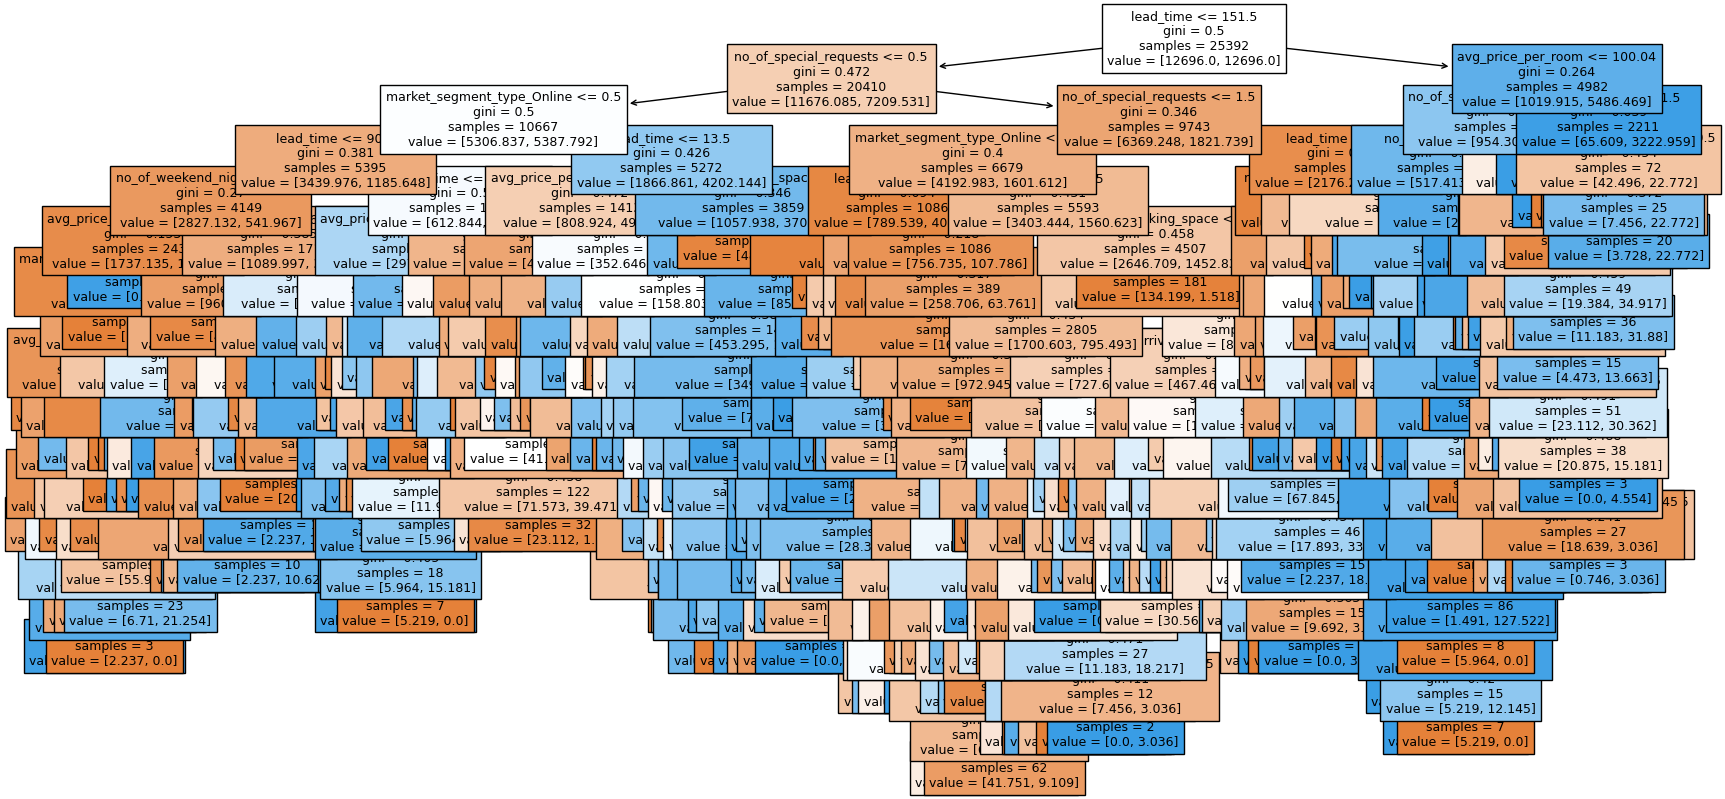

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

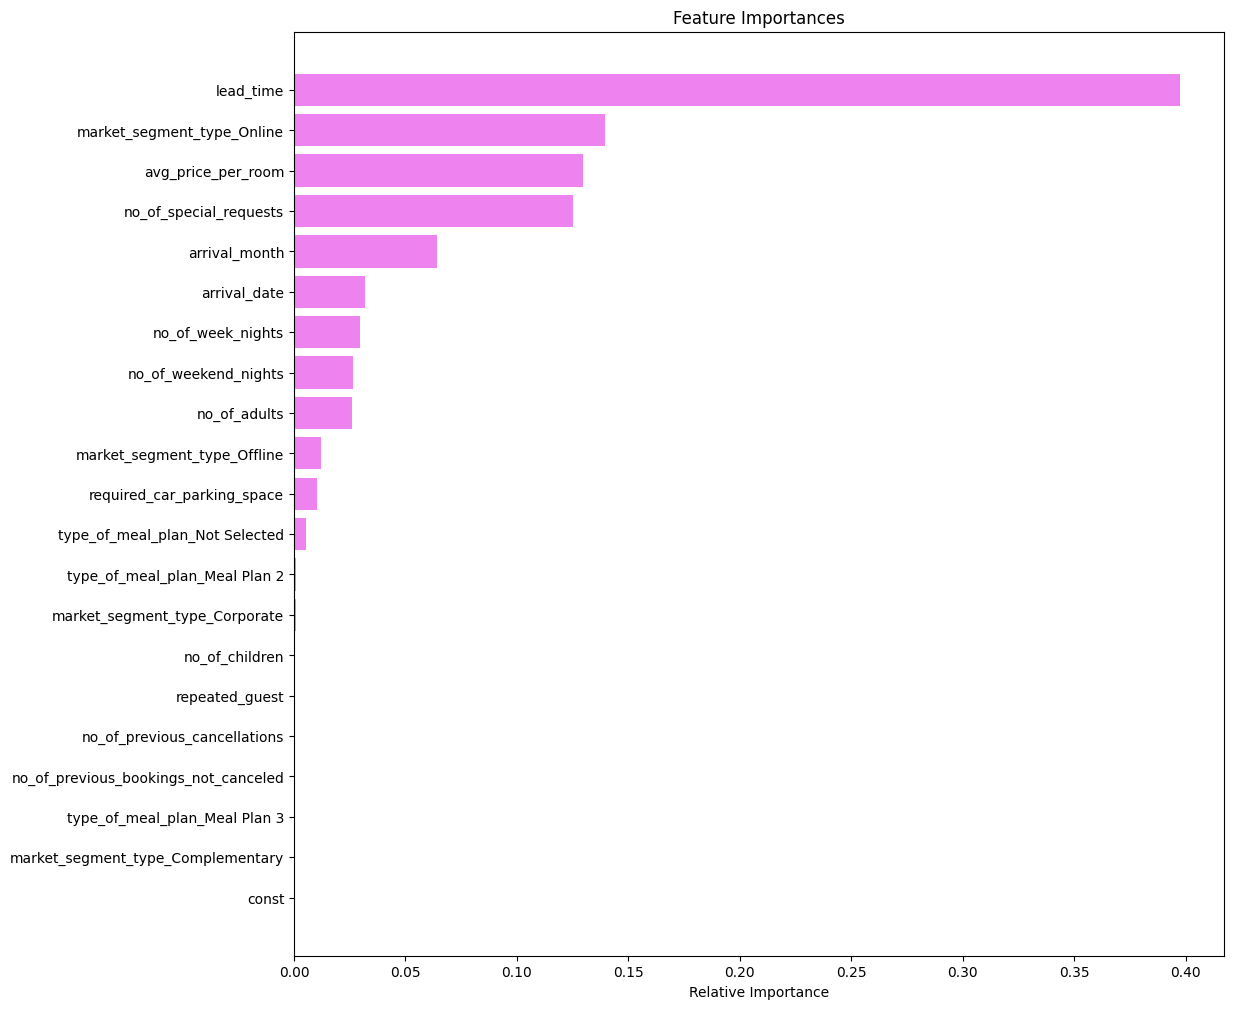

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Conclusions

In [ ]:
#Training performance comparison
models_train_comp_df = pd.concat(
    [
      decision_tree_perf_train_default.T,
       decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.993108,0.618541,0.893037
Recall,0.995097,0.856511,0.883893
Precision,0.984153,0.457729,0.809018
F1,0.989595,0.596618,0.844800


In [ ]:
#Testing performance comparison
models_test_comp_df = pd.concat(
[
    decision_tree_perf_test_default.T,
    decision_tree_tune_perf_test.T,
    decision_tree_test.T,

],
axis=1,)

models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.865386,0.618396,0.893037
Recall,0.801817,0.862294,0.883893
Precision,0.786410,0.452946,0.809018
F1,0.794039,0.593918,0.844800


## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

*Business* Recommendations
linkcode
In order to reduce the likelihood of cancellation, you can create a marketing campaign that allows a raffle for free room
Generally speaking, a customer may have special requests, in which employment satisfaction and customer service will increase since the employee will do its best to find a room that satisfies these requests
Keep the prices low in months of high demand to attract more people and to reduce the likelihood of cancellation
Create brand loyaly among repeating customers such as reward cards and complementary breakfasts in order to maintain it
Create a kid's room as an attraction tool in order to decrease the likelihood of cancellation due to parents having a lot of children and being able to acommodate them will reduce the pain of staying at a hotel